# **20520950 Ngô Đức Vũ**

In [105]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv')
#Mô tả sơ lược về dữ liệu: 
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


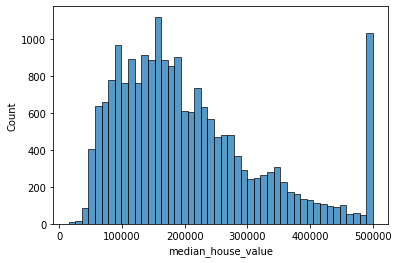

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
sns.histplot(data['median_house_value'])


# **Câu hỏi 1: Dựa vào kết quả thu được, hãy cho biết khoảng min - max của biến mục tiêu(median_house_value) trong bộ dữ liệu. Có nhận xét gì về miền giá trị của biến mục tiêu? (giá trị min-max, mean, median như thế nào?)**

In [107]:
print ('Minimum:', min(data['median_house_value']))
print( 'Maximum:', max(data['median_house_value']))

Minimum: 14999.0
Maximum: 500001.0


In [108]:
print("median :")
statistics.median(data['median_house_value'])

median :


179700.0

In [109]:
print("mean :")
statistics.mean(data['median_house_value'])

mean :


206855.81690891474

# **Câu hỏi 2:Hãy cho biết bộ dữ liệu có bao nhiêu dòng, và có tổng cộng bao nhiêu thuộctính? Liệt kê ra các thuộc tính. Sử dụng: data.columns.**

In [110]:
print('Row count is:', len(data))

Row count is: 20640


In [111]:
col= data.columns
print('Columns are:', col)

Columns are: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [112]:
ncol = len(col)
print('Col count is:', ncol)

Col count is: 10


#**Câu hỏi 3: Cho biết số lượng các giá trị NA trong thuộc tính.**

In [113]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## **2. Chuẩn bị dữ liệu huấn luyện.**


#**Câu hỏi 4:Vẽ Ma trận tương quan giữa các thuộc tính và thể hiện lên màn hình theo code gợi ý. Cho biết mức độ tương quan giữa các thuộc tính với nhau**

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

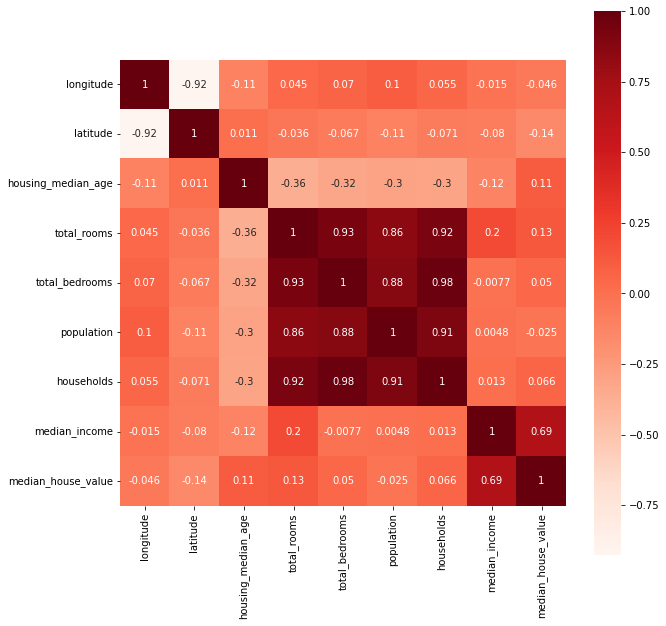

In [150]:
# tinh su phu thuoc cua tung thuoc tinh dùng person
correlation = data.corr(method='pearson')
print(correlation)
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Reds')


In [ ]:
# tinh su phu thuoc cua tung thuoc tinh dung kendall
correlation = data.corr(method='kendall')
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Reds')

In [ ]:
# tinh su phu thuoc cua tung thuoc tinh dung kendall
correlation = data.corr(method='spearman')
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Reds')

**Kết luận:**
Ở ba độ đo, kết quả đều cho ra là **median_income** sẽ tương quan nhất với **median_house_value**

# **Câu hỏi 5: Vẽ biểu đồ tán xạ (scatter plot) giữa thuộc tính median_income và thuộc tính median_house_value.**

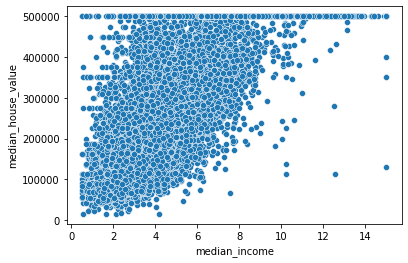

In [117]:
# Ve bieu do tan xa du lieu huan luyen
sns.scatterplot(data=data,x=data["median_income"], y=data["median_house_value"],)

#**Câu hỏi 6: Hãy phân chia dữ liệu huấn luyện (X,y) thành tập huấn luyện và tập kiểm thử theo tỉ lệ lần lượt là 8-2. Cho biết chiều (shape) của từng tập dữ liệu**

In [118]:
X = data.drop(labels = "median_house_value", axis=1).values
y = data['median_house_value'].values

In [119]:
from sklearn.impute import SimpleImputer
import numpy as np
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
#imputer.fit(X[:, :-1])
X[:, :-1] = imputer.fit_transform(X[:, :-1])

In [120]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X[:,-1] = encoder.fit_transform(X[:,-1])

In [121]:
X.shape

(20640, 9)

In [122]:
#Cắt dataframe sang tập train và test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
print(X_train.shape)

(16512, 9)


In [124]:
print(X_test.shape)

(4128, 9)


In [125]:
print(y_train.shape)

(16512,)


In [126]:
print(y_test.shape)

(4128,)


# **3. Huấn luyện mô hình và kiểm thử**

In [127]:
#Chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, :] = sc.fit_transform(X_train[:, :])
X_test[:, :] = sc.fit_transform(X_test[:, :])
y_train = sc.fit_transform(y_train.reshape(-1,1)).reshape(-1)
y_test = sc.fit_transform(y_test.reshape(-1,1)).reshape(-1)

In [128]:
X_train

array([[1.2725865624711816, -1.3728111990668923, 0.34849024666633743,
        ..., 0.32290590860844803, -0.3261960037692997,
        2.0059317206135328],
       [0.7091621244196555, -0.8766960138235843, 1.6181181253037833, ...,
        0.6720272000823109, -0.035843376698674385, 2.0059317206135328],
       [-0.4476030935268487, -0.46014647149665977, -1.952710283364033,
        ..., -0.43046108878251915, 0.14470144729640774,
        2.0059317206135328],
       ...,
       [0.5994688709936948, -0.7550073834808873, 0.5865454739108585, ...,
        0.07090858543934404, -0.49697313222538075, -0.8185460392748126],
       [-1.1855395256651284, 0.9065104538905641, -1.079841116800789, ...,
        0.1549076931623787, 0.9654504450332139, -0.8185460392748126],
       [-1.4148981464648696, 0.995436760679461, 1.8561733525483044, ...,
        1.9477636486258998, -0.6854476445343832, 1.2998122806414465]],
      dtype=object)

In [129]:
#Huấn luyện mô hình
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [130]:
from sklearn.metrics import mean_squared_error
y_pred = LR.predict(X_test)
mse = mean_squared_error(y_test, y_pred, squared= False)
rmse = np.sqrt(mse)

print(mse)
print(rmse)

0.6210985318331903
0.7880980470938818


In [131]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LR, X, y,
                             scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-scores)

print(rmse_scores)

[67496.60883072 75139.67179381 77471.62927178 73462.25527197
 67333.76703057]


In [132]:
y_pred

array([-1.13005074, -0.3402926 ,  0.5203687 , ...,  2.05667791,
       -0.64791805, -0.26069332])

In [133]:
pred = pd.DataFrame({"y" : y_test, "y_pred" : y_pred})
pred.head(20)

,y,y_pred
0,-1.378493,-1.130051
1,-1.395090,-0.340293
2,2.572663,0.520369
3,0.114435,0.617065
4,0.633334,0.640796
5,-0.408832,-0.335048
6,-0.063773,0.825563
7,-0.419315,0.268802
8,1.174946,0.558270
9,2.106169,1.851000


In [134]:
from sklearn import metrics
print(metrics.r2_score(y_test, y_pred))

0.6142366137546554


In [135]:
print(X[:, 7:8])
print(y_test.shape)
data.head(20)

[[8.3252]
 [8.3014]
 [7.2574]
 ...
 [1.7]
 [1.8672]
 [2.3886]]
(4128,)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


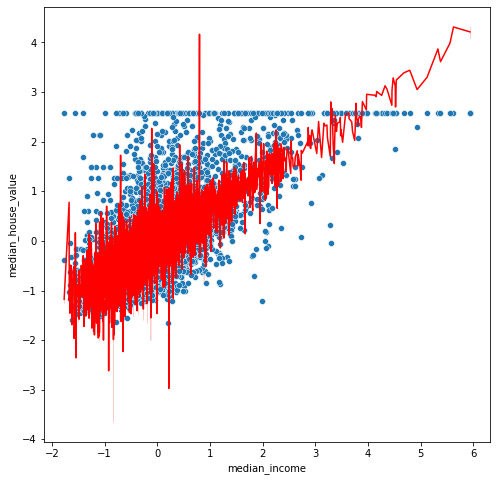

In [136]:
import seaborn as sns
test_true = pd.DataFrame({'median_income': X_test[:, 7:8].reshape(-1), 'median_house_value': y_test})
test_pred = pd.DataFrame({'median_income': X_test[:, 7:8].reshape(-1), 'median_house_value': y_pred})
fig= plt.figure(figsize=(8,8))
sns.lineplot(data=test_pred, x="median_income", y="median_house_value", color='red')
sns.scatterplot(data=test_true, x="median_income", y="median_house_value")

# **4. Cross validation**

# **Câu hỏi 8: Thực hiện lại mô hình Hồi quy tuyến tính bằng phương pháp cross - valiation. Cho biết kết quả cuối cùng theo độ đo MSE**

In [137]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
sc = StandardScaler()
kf = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
avg_mse = []
for train_index, test_index in kf.split(X, y):
    X_train_temp = X[train_index]
    y_train_temp = y[train_index]
    X_test_temp = X[test_index]
    y_test_temp = y[test_index]
    model = LinearRegression()
    
    X_train_temp = sc.fit_transform(X_train_temp)
    X_test_temp = sc.fit_transform(X_test_temp)
    y_train_temp = sc.fit_transform(y_train_temp.reshape(-1, 1))
    y_test_temp = sc.fit_transform(y_test_temp.reshape(-1, 1))

    model.fit(X_train_temp, y_train_temp)
    y_pred = model.predict(X_test_temp)
    result = mean_squared_error(y_test_temp, y_pred, squared=True)
    # Lưu lại kết quả từng fold vào avg_mse
    avg_mse.append(result)

In [138]:
import numpy as np
np.mean(np.array(avg_mse))

0.369865807924257

# **Bài 2: Thực hiện dự đoán giá nhà dựa vào thuộc tính total_bedrooms**

In [139]:
X_bedroom = data["total_bedrooms"].values
y_bedroom = y
y_bedroom_pd = pd.DataFrame({"median_house_value" : y_bedroom})
X_bedroom_pd = pd.DataFrame({"total_bedrooms" : X_bedroom})
X_bedroom = X_bedroom.reshape(-1, 1)

In [140]:
#Điền giá trị thiếu bằng mean
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer.fit(X_bedroom)
X_bedroom = imputer.transform(X_bedroom)


In [141]:
X_bedroom_pd = pd.DataFrame({"total_bedrooms" : [X_bedroom]})

In [142]:
from sklearn.model_selection import train_test_split
X_bedroom_train, X_bedroom_test, y_bedroom_train, y_bedroom_test = train_test_split(X_bedroom, y_bedroom.reshape(-1, 1), test_size = 0.2)

In [143]:
#Chuan hoa du lieu
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_bedroom_train = sc.fit_transform(X_bedroom_train)
X_bedroom_test = sc.fit_transform(X_bedroom_test)
y_bedroom_train = sc.fit_transform(y_bedroom_train)
y_bedroom_test = sc.fit_transform(y_bedroom_test)

In [144]:
#Train model
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_bedroom_train, y_bedroom_train)

LinearRegression()

In [145]:
from sklearn.metrics import mean_squared_error
y_bedroom_pred = LR.predict(X_bedroom_test)
mse = mean_squared_error(y_bedroom_test, y_bedroom_pred)
rmse = np.sqrt(mse)
print(rmse)

0.998644297369953


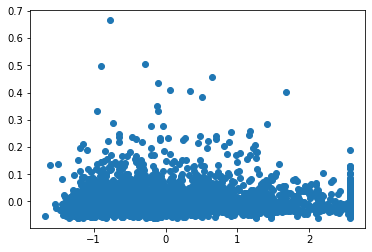

In [146]:
plt.scatter(y_bedroom_test, y_bedroom_pred)

In [147]:
from sklearn import metrics
100*metrics.r2_score(y_bedroom_test, y_bedroom_pred)

0.2709567330472895

In [148]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
sc = StandardScaler()
kf = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
avg_mse = []
for train_index, test_index in kf.split(X, y):
    X_train_temp = X_bedroom[train_index]
    y_train_temp = y_bedroom[train_index]
    X_test_temp = X_bedroom[test_index]
    y_test_temp = y_bedroom[test_index]
    model = LinearRegression()
    
    X_train_temp = sc.fit_transform(X_train_temp)
    X_test_temp = sc.fit_transform(X_test_temp)
    y_train_temp = sc.fit_transform(y_train_temp.reshape(-1, 1))
    y_test_temp = sc.fit_transform(y_test_temp.reshape(-1, 1))
    model.fit(X_train_temp.reshape(-1, 1), y_train_temp.reshape(-1, 1))
    y_pred = model.predict(X_test_temp.reshape(-1, 1))
    result = mean_squared_error(y_test_temp, y_pred, squared=True)
    # Lưu lại kết quả từng fold vào avg_mse
    avg_mse.append(result)

np.mean(np.array(avg_mse))

0.9977595945248886